## Grover's Algorithm

This notebook serves to implement Grover's Algorithm in a Jupyter Notebook. Grover's Algorithm is known as the quantum search algorithm. It is used to find a unique input to a black box function that produces a particular output value, or set of output values. Here we are creating a two qubit algorithm, but higher level algorithms are possible.



### Imports

First, we begin with a series of import statements. We need a number of general Python tools for plotting and analysis. We also need a number of tools from qiskit to create, run, and visualize our quantum circuit. 

In [1]:
# Python Tools

import matplotlib.pyplot as plt
import numpy as np
import time
import math

# Qiskit Tools

from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute, transpile
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise

In [2]:
# Set devices, if using a real device
IBMQ.delete_account()
IBMQ.save_account('a41724e133deeffc5b4a8b980d7a142be6d1662732f3006d8a6549970a22c90d54dd808152026a4325dc1929f65c017e4ca7d6c394b5e11631bb97dbfaf41f81')
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_santiago')



### Creating the Circuit

Now that the imports are complete, we want to initialize our quantum circuit. In this circuit, we want to make a state for the algorithm to recover. We begin by intitializing a two qubit circuit sent into a superposition by two Haddamard gates.

In [3]:
#Create and set up the intial circuit
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
grover_circ = QuantumCircuit(qreg_q, creg_c)
grover_circ.h([0,1])

In [4]:
#Visualize the circuit
grover_circ.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘
c: 2/═════

### Applying the Oracle Matrix and the Diffuser

Now we need to add the components onto this circuit to make it function as a two qubit Grover's Algorithm. These components are the Oracle Matrix and the Diffuser. Starting with the Oracle Matrix, which in our case is a CZ gate:

In [5]:
# Create the CZ gate

grover_circ.cz(0,1)

In [6]:
grover_circ.data.pop()

(<qiskit.circuit.library.standard_gates.z.CZGate at 0x7f2c00748ca0>,
 [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)],
 [])

In [7]:
#Apply the Diffuser

grover_circ.h([0,1])
grover_circ.z([0,1])
grover_circ.cz(0,1)
grover_circ.h([0,1])

In [8]:
# Execute and get counts

job = execute(grover_circ, backend = quito, shots = 1024, optimization_level = 3)
from qiskit.tools.monitor import job_monitor
job_monitor(job, interval = 2)

Job Status: job has successfully run


In [9]:
result = job.result()
counts = result.get_counts(grover_circ)
print(counts)

{'00': 1024}


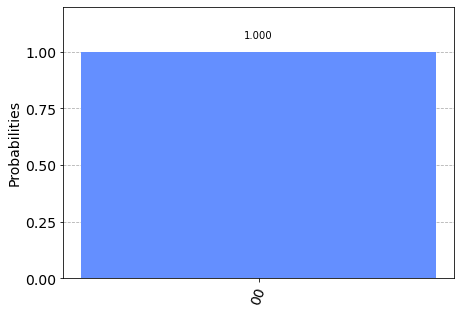

In [10]:
plot_histogram(counts)